In [14]:
# Imports and defs
from matplotlib import pyplot as plt
import pandas as pd
import pickle


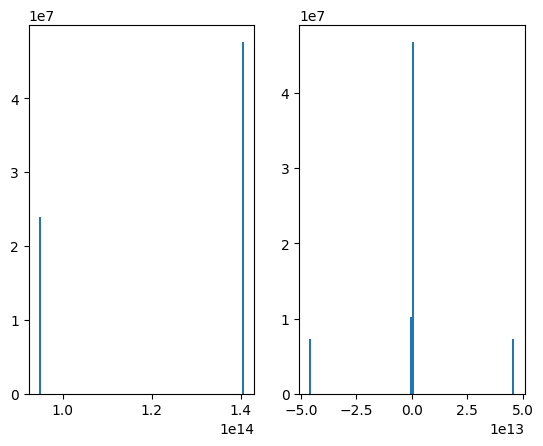

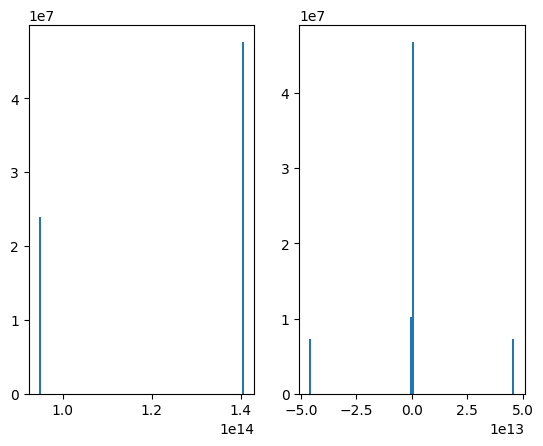

In [28]:
pickle.load(open('/traces/canneal/hist_100.pickle','rb'))

In [ ]:
s